# __R Session n°2 : tutorial__
M1 MEG UE5 - Claire Vandiedonck
***

## **introduction on factors**


## 1. Qu’est-ce qu’un facteur?
---

Les variables catégoriques peuvent prendre des valeurs numériques ou être des chaines de caractères. **Pour les utiliser de manière correcte en modélisation statistique et tester leur impact sur d’autres variables, il est nécessaire de les transformer en facteurs qui doivent être des entiers**, ce qui peut nécessiter une conversion. Certaines fonctions sous R le font de manière cachée : c’est le cas de boxplot!

***Exemple:***
Ci-dessous, on affiche la distribution de la consommation en carburant (variable `mpg` = miles per gallon) en fonction du nombre de cylindres (variable `cyl`). En statistiques, le nombre de cylindres est un facteur avec  3 niveaux (4,6 et 8). Mais quand on regarde la structure du dataframe `mtcasr` le type est numérique et non un facteur.

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


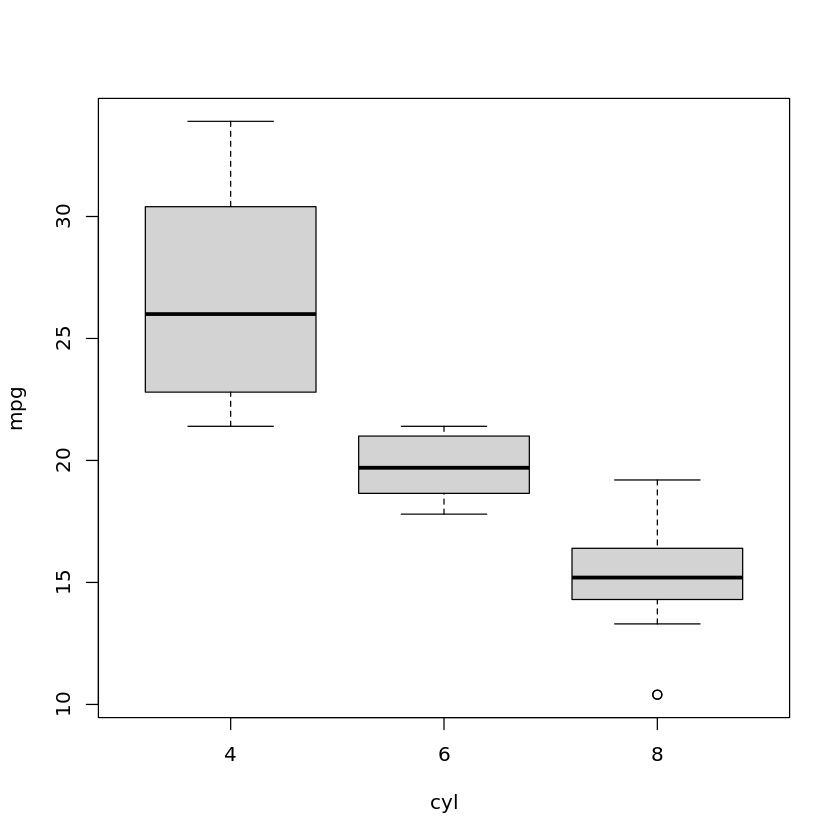

In [1]:
str(mtcars)
boxplot(data=mtcars, mpg~cyl)

Si vous transformez la variable "cyl" en variable avec une chaîne de caractères en ajoutant par exemple "cyl_" devant la valeur numérique, la fonction boxplot sera toujours capable de traiter cette variable comme un facteur.

[1] "character"

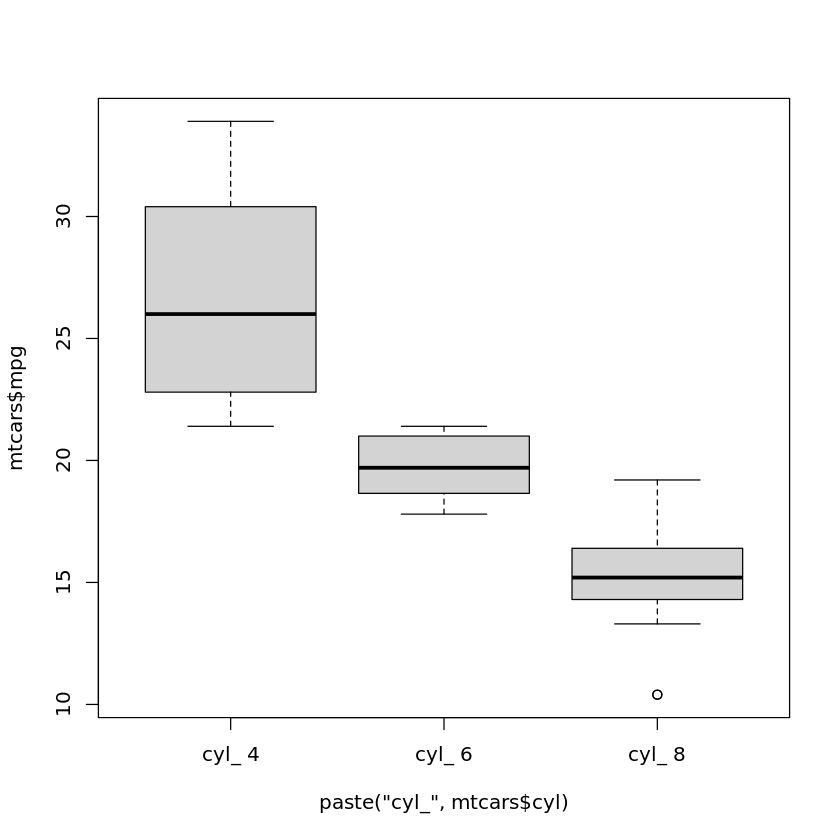

In [2]:
class(paste("cyl_", mtcars$cyl))
boxplot(mtcars$mpg ~ paste("cyl_", mtcars$cyl))

## 2. Conversion en facteur avec la fonction `factor()`:
---

La fonction `factor()` permet de convertir vous-même un vecteur (une variable) en un facteur qui encode les différentes valeurs possibles de la variable.

Sous R, les valeurs entières de 1 à n correspondront aux **index du facteur**. Ces valeurs d’index ou « codes » sont attribuées par défaut selon l’ordre alphabétique ou numérique (cf. help(factor)) des différentes valeurs possibles, appelés niveaux ou **levels** de la variable.

- si les valeurs sont **numériques**:

Elles sont elles-mêmes renumérotées ou ré-indexées de 1 à n ! Par exemple, si vous avez les entiers de 4 à 10 dans un vecteur v1 :

In [3]:
v1<-4:10
print(factor(v1))

[1] 4  5  6  7  8  9  10
Levels: 4 5 6 7 8 9 10


In [4]:
str(factor(v1))

 Factor w/ 7 levels "4","5","6","7",..: 1 2 3 4 5 6 7


La factorisation de v1 a donc créé un 1 facteur à 7 niveaux correspondant aux valeurs catégoriques “4” à “10” mais indexées 1 à 7 !

- Si les valeurs sont des **chaines de caractère**:

Elles sont indexées de 1 à n : Par exemple, si je factorise le vecteur suivant contenant 4 valeurs :

In [5]:
v2 <- c("Homme","Femme","Homme","Homme")
print(factor(v2))

[1] Homme Femme Homme Homme
Levels: Femme Homme


Les valeurs “Homme” et “Femme” auront respectivement comme index les valeurs 2 et 1 car “Femme” sort avant “Homme” selon l’ordre alphabétique. Les valeurs 1, 3 et 4 du vecteur v2 seront donc codées 2, tandis que la 2ème sera codée 1, ce que vous voyez en regardant la structure du facteur créé :

In [6]:
str(factor(v2))

 Factor w/ 2 levels "Femme","Homme": 2 1 2 2


Mais ce n’est cependant pas nécessairement le code que vous voulez garder : souvent on met « 2 » pour les femmes et « 1 » pour les « hommes ». De même, “cas” et “controles” seront convertis en 1 et 2. Or **il est souvent préférable de donner la valeur 1 à la référence à laquelle on compare** et donc on peut souhaiter imposer que 1 corresponde aux “controles” et 2 aux “cas”

## 3. Choisir les niveaux d'un facteur
---

Il peut donc être nécessaire d’imposer par vous-mêmes l’ordre de votre choix qui ne serait pas alphabétique ou numérique. L’argument `levels` permet d’imposer cet ordre.

En utilisant la fonction `factor()`, vous pouvez utiliser en particulier deux arguments pour choisir vous- même l’ordre des niveaux d’une part et leurs noms d’autre part:

**1. L’argument `levels`** permet de préciser l’ordre de vos niveaux dans un ordre qui pourrait être différent de l’ordre alphabétique ou numérique.

**2. L’argument `labels`** permet de renommer chaque niveau du facteur, sans modifier l’ordre par défaut ou spécifié par levels. Par exemple, vous voulez renommer “Homme” par “Man” et “Femme” par “Woman”.

Pour ces deux arguments, vous donnez un vecteur avec les noms des niveaux.

## 4. Exemple pas à pas illustrant l’usage de `factor()` avec les arguments `levels` et `labels` 
---

Prenez par exemple le vecteur d’un score de satisfaction à une enquête:

In [7]:
satisfaction<-c("mauvais","bon","acceptable","bon","bon","mauvais")
print(satisfaction)

[1] "mauvais"    "bon"        "acceptable" "bon"        "bon"       
[6] "mauvais"   


### a- conversion en facteur

Vous pouvez le **convertir en un facteur** avec la fonction `factor()`

In [8]:
satisfaction_factor <- factor(satisfaction)
print(satisfaction_factor)

[1] mauvais    bon        acceptable bon        bon        mauvais   
Levels: acceptable bon mauvais


L’objet obtenu est un facteur à 3 niveaux recodés par les index 1, 2 et 3.

Vous ne voyez pas les index directement, mais ils sont visibles si vous utiliser la fonction `str()`. Voir un peu plus bas.

Par défaut, les codes/index 1 à n sont donnés aux niveaux selon l’ordre alphabétique des valeurs uniques. Dans l’exemple, “acceptable” est donc recodé 1, “bon” 2 et “mauvais” 3. Avant de factoriser, vous pouvez identifier l’ordre avec `sort()` appliqué aux valeurs uniques de votre vecteur de départ.

In [9]:
sort(unique(satisfaction))

[1] "acceptable" "bon"        "mauvais"

Vous retrouvez cet ordre avec la fonction levels()appliquée à votre facteur.

In [10]:
levels(satisfaction_factor)

[1] "acceptable" "bon"        "mauvais"

Ainsi, “acceptable” a l’index 1, “bon” l’index 2 et “mauvais” l’index 3 du vecteur levels Si vous regardez la structure de votre facteur avec la fonction `str()`, vous obtenez bien un facteur à 3 niveaux, dont le nom trié alpha-numériquement correspondant au résultats de `levels()` est donné, suivi de l’affichage des premières valeurs codées. Ici, vous obtenez 3 puis 2 puis 1 puis 2 puis 2 puis 3, correspondant aux index/codes des niveaux

In [11]:
str(satisfaction_factor)

 Factor w/ 3 levels "acceptable","bon",..: 3 2 1 2 2 3


### b -recodage des niveaux du facteurs

Si vous voulez imposer que “mauvais” soit codé par 1, “acceptable” par 2 et “bon” par 3, vous ajoutez ces 3 niveaux dans cet ordre au moment de créer votre facteur avec l’argument `level` auquel vous donnez le vecteur_des_niveaux_du_facteur_dans_ordre_souhaité, par exemple de 1 à 3 du moins bon au meilleur. Dans l’exemple, j’ajoute “2” au nom de ce nouvel objet R:



In [12]:
satisfaction_factor2 <- factor(satisfaction, levels = c("mauvais","acceptable", "bon"))

Vous constatez alors avec la fonction str() que les données sont désormais 1, puis 3, puis 2, puis 3 etc…selon les niveaux choisis :

In [13]:
str(satisfaction_factor2)

 Factor w/ 3 levels "mauvais","acceptable",..: 1 3 2 3 3 1


### c - renommage des niveaux du facteur

Si maintenant vous souhaitez en plus renommer les niveaux par “bad”, “satisfactory”, “good”, vous ajoutez l’argument “labels” dans une version 3:

In [14]:
satisfaction_factor3<-factor(satisfaction,levels=c("mauvais", "acceptable", "bon"), labels=c("bad","satisfactory", "good"))

Si vous regardez la structure et à quels index correspondent les données, c’est dans l’ordre souhaité comme dans le facteur version 2.

In [15]:
str(satisfaction_factor3)

 Factor w/ 3 levels "bad","satisfactory",..: 1 3 2 3 3 1


Et vous pouvez voir la reconversion des noms des niveaux:

In [16]:
print(satisfaction_factor3)

[1] bad          good         satisfactory good         good        
[6] bad         
Levels: bad satisfactory good


<div class="alert alert-block alert-danger"><b>Attention toutefois lorsque vous utilisez l’argument “labels” dans l’ordre souhaité en oubliant d’utiliser l’argument “levels”</b><br> car vous aboutissez à remplacer les valeurs de façon incorrecte. La version 4 ci-dessous n’est pas du tout celle souhaitée et a remplacé les données !<br>
    </div>

In [17]:
satisfaction_factor4<-factor(satisfaction,labels=c("bad", "satisfactory", "good"))
print(satisfaction_factor4)

[1] good         satisfactory bad          satisfactory satisfactory
[6] good        
Levels: bad satisfactory good


In [18]:
str(satisfaction_factor4)

 Factor w/ 3 levels "bad","satisfactory",..: 3 2 1 2 2 3


SI vous n'êtes pas convaincus, affichons les comptes obtenus avec la fonction `table()` et comparons aux comptes initiaux:

In [19]:
table(satisfaction_factor4)

satisfaction_factor4
         bad satisfactory         good 
           1            3            2 

In [20]:
table(satisfaction)

satisfaction
acceptable        bon    mauvais 
         1          3          2 

**=> IL EST DONC IMPORTANT DE CONTROLER VOUS-MEMES LA FACON DONT LES VARIABLES SONT FACTORISEES.**

## 5. Facteurs et dataframes

---

Finalement, attention aux factorisations indésirables, notamment lors de la création d’un dataframe à partir d’une matrice, en particululier dans les version de R < 4.

Soit un vecteur numérique de 20 éléments issus d'une loi exponentionelle de paramètre 7 créé avec la fonction rexp :

In [21]:
x <- rexp(20,7)

Avec le vecteur des 20 premières lettres de l’alphabet, on crée un data frame. On utilise pour commencer la fonction data.frame():

In [22]:
y <- data.frame(V1=LETTERS[1:20], V2=x)
head(y)

,V1,V2
,<chr>,<dbl>
1,A,0.0760314952
2,B,0.1810817698
3,C,0.1223393931
4,D,0.2607171391
5,E,0.1368292118
6,F,0.0006828872


In [23]:
str(y)

'data.frame':	20 obs. of  2 variables:
 $ V1: chr  "A" "B" "C" "D" ...
 $ V2: num  0.076 0.181 0.122 0.261 0.137 ...


Rien n'a été converti en facteur dans les version R>=4 car l'argument `stringsAsFactors=FALSE` est l'option par défaut comme vous pouvez le lire dans l'aide de la fonction.

In [24]:
?data.frame

data.frame {base},R Documentation
...,these arguments are of either the form value or tag = value. Component names are created based on the tag (if present) or the deparsed argument itself.
row.names,"NULL or a single integer or character string specifying a column to be used as row names, or a character or integer vector giving the row names for the data frame."
check.rows,if TRUE then the rows are checked for consistency of length and names.
check.names,logical. If TRUE then the names of the variables in the data frame are checked to ensure that they are syntactically valid variable names and are not duplicated. If necessary they are adjusted (by make.names) so that they are.
fix.empty.names,"logical indicating if arguments which are “unnamed” (in the sense of not being formally called as someName = arg) get an automatically constructed name or rather name """". Needs to be set to FALSE even when check.names is false if """" names should be kept."
stringsAsFactors,"logical: should character vectors be converted to factors? The ‘factory-fresh’ default has been TRUE previously but has been changed to FALSE for R 4.0.0. Only as short time workaround, you can revert by setting options(stringsAsFactors = TRUE) which now warns about its deprecation."


Dans les versions de R antérieures à la version 4, le même paramètre est `stringsAsFactors=TRUE` ce qui conduit à une factorisation automatique des variables catégroriques même si ce n'est pas souhaité. Nous aurions donc: 

In [25]:
y <- data.frame(V1=LETTERS[1:20], V2=x, stringsAsFactors = TRUE)
head(y)

,V1,V2
,<fct>,<dbl>
1,A,0.0760314952
2,B,0.1810817698
3,C,0.1223393931
4,D,0.2607171391
5,E,0.1368292118
6,F,0.0006828872


In [26]:
str(y)

'data.frame':	20 obs. of  2 variables:
 $ V1: Factor w/ 20 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ V2: num  0.076 0.181 0.122 0.261 0.137 ...


Ci-dessus, la variable V1 a été factorisée.

<div class="alert alert-block alert-warning"><b>Attention:</b> Cependant très souvent, on utilise plutôt <b>à tort</b> la fonction cbind() donc on passe par une matrice avant de créer le dataframe et cela pose un problème si l'argument stringsAsFactors=TRUE: </div>

In [27]:
z <- cbind(V1=LETTERS[1:20], V2=x)
head(z)

V1,V2
A,0.0760314951517752
B,0.181081769848893
C,0.12233939313927
D,0.260717139128588
E,0.136829211846352
F,0.000682887155562639


In [28]:
str(z)

 chr [1:20, 1:2] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "V1" "V2"


On voit que x a été contraint (‘coerced’) d’être transformé en vecteur chaine de caractères. Le plus souvent, cela passe inaperçu à cette étape et le problème est révélé lors de la transformation en dataframe:

In [29]:
u <- as.data.frame(z, stringsAsFactors=TRUE)
head(u)

,V1,V2
,<fct>,<fct>
1,A,0.0760314951517752
2,B,0.181081769848893
3,C,0.12233939313927
4,D,0.260717139128588
5,E,0.136829211846352
6,F,0.000682887155562639


In [30]:
str(u)

'data.frame':	20 obs. of  2 variables:
 $ V1: Factor w/ 20 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ V2: Factor w/ 20 levels "0.000682887155562639",..: 6 14 11 17 12 1 16 10 18 7 ...


On constate que les deux variables sont maintenant des facteurs. Pour la variable x qui était numérique au départ, cela est généralement involontaire.

Pour rattraper cette “erreur”, on utilise alors spontanément la fonction as.numeric():

In [31]:
u$V2 <- as.numeric(u$V2)
str(u)

'data.frame':	20 obs. of  2 variables:
 $ V1: Factor w/ 20 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ V2: num  6 14 11 17 12 1 16 10 18 7 ...


On constate que la transformation `as.numeric()` a en fait recyclé les niveaux correspondant aux valeurs, et pas du tout les valeurs elles-mêmes. Dans cet exemple, l’erreur est rapidement détectée car l’on partait de valeurs décimales. Lorsqu’il s’agit d’entiers au départ, le problème peut très facilement rester inaperçu.

Dans cette situation, il faut en fait procéder en deux étapes (après avoir recréé le dataframe à partir de la matrice) en conversitassant d'abord en chaine de caractères puis en valeur numérique:

In [32]:
z2 <- as.data.frame(z)
z2$V2 <- as.character(z2$V2)
str(z2)

'data.frame':	20 obs. of  2 variables:
 $ V1: chr  "A" "B" "C" "D" ...
 $ V2: chr  "0.0760314951517752" "0.181081769848893" "0.12233939313927" "0.260717139128588" ...


In [33]:
z2$V2 <- as.numeric(z2$V2)
str(z2)

'data.frame':	20 obs. of  2 variables:
 $ V1: chr  "A" "B" "C" "D" ...
 $ V2: num  0.076 0.181 0.122 0.261 0.137 ...


In [34]:
head(z2)

,V1,V2
,<chr>,<dbl>
1,A,0.0760314952
2,B,0.1810817698
3,C,0.1223393931
4,D,0.2607171391
5,E,0.1368292118
6,F,0.0006828872


---
---

## Conclusion


<div class="alert alert-block alert-success"><b>Points clés:</b>

- les facteurs en R sont utilisés pour les statistiques et les figures

- il est préférable de contrôler soi-même les niveaux afin de mettre la valeur "1" à la référence

- l'argument stringsAsFactors=TRUE est dangereux car il peut conduire à des conversions incontrôlées. Ce paramètre par défaut a heuresement était modifié en `FALSE` à partir de la version 4 de R. C'est également le cas pour Tydiverse avec les tibbles.
</div>